<a href="https://colab.research.google.com/github/ArySuby/Proyecto_CoderDS_SUBY_Ary2daparte/blob/main/ModeloMerlu2004_2024SinEdadCero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerias, carga de archivo y preprocesamiento de los datos**

In [151]:
# Librerias Iniciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [152]:
# Carga de Archivo
from google.colab import files
uploaded = files.upload()

Saving merluza2004_2024SINEDAD0.xlsx to merluza2004_2024SINEDAD0 (1).xlsx


In [153]:
# Lectura de archivo
df = pd.read_excel("merluza2004_2024SINEDAD0.xlsx", parse_dates=["fecha"])

In [174]:
df_resultados["sexo"] = df_resultados["sexo"].astype(int)
print(df["sexo"].unique())


['2' '1']


In [175]:
print(df["sexo"].value_counts(dropna=False))


sexo
2    99909
1    68468
Name: count, dtype: int64


In [176]:
print(df["largo_tot"].min())
print([int(x) for x in sorted(df["largo_tot"].unique())])

15
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95]


In [177]:
# Previsualizacion
print("Primeras filas:")
print(df.head())
print(len(df))
print("\nColumnas disponibles:", df.columns.tolist())

Primeras filas:
       fecha  n_ejemp  largo_tot sexo  edad  residuos  predicciones_lr  \
0 2016-01-05        1         16    2     1  1.394277        -0.394277   
1 2016-01-05        2         19    1     1  0.548197         0.451803   
2 2016-01-05        3         25    1     1 -0.227815         1.227815   
3 2016-01-05        4         26    1     1 -0.357151         1.357151   
4 2016-01-05        5         27    1     2  0.513514         1.486486   

    errores  
0  1.394277  
1  0.548197  
2  0.227815  
3  0.357151  
4  0.513514  
168377

Columnas disponibles: ['fecha', 'n_ejemp', 'largo_tot', 'sexo', 'edad', 'residuos', 'predicciones_lr', 'errores']


In [178]:
# Preprocesamiento de los datos
#1. Convertir fecha a datetime
df["fecha"] = pd.to_datetime(df["fecha"], errors='coerce')

#2. Eliminar filas con valores faltantes en columnas relevantes
df = df.dropna(subset=["largo_tot", "sexo", "edad", "fecha"])

**DEFINICION DEL MODELO**

In [179]:
# Variables predictoras y objetivo
X = df[["largo_tot", "sexo"]].copy()
y = df["edad"]

# Codificar sexo
X["sexo"] = X["sexo"].astype("category").cat.codes

In [161]:
# División de datos en entrenamiento y testeo del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                    random_state=123, stratify=X["sexo"])

In [162]:
# Modelo Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [163]:
# Evaluación
def evaluar_modelo(nombre, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{nombre} - RMSE:", rmse)
    print(f"{nombre} - R2:", r2)

evaluar_modelo("Regresión Lineal", y_test, y_pred_lr)


Regresión Lineal - RMSE: 0.6953271867204857
Regresión Lineal - R2: 0.7385134998163643


In [164]:
# Coeficientes del modelo
coeficientes = pd.DataFrame(lr.coef_, X.columns, columns=["Coeficiente"])
print(coeficientes)

           Coeficiente
largo_tot     0.129335
sexo         -0.458074


**VISUALIZACION DE LA REGRESION**

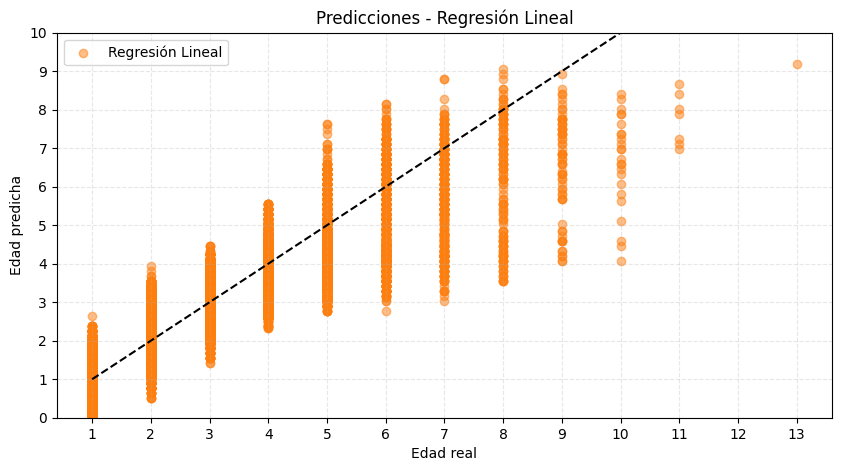

In [180]:
# Visualización Regresión Lineal
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Regresión Lineal", color='C1')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

plt.xlabel("Edad real")
plt.ylabel("Edad predicha")
plt.legend()
plt.title("Predicciones - Regresión Lineal")

# Establecer ticks de uno en uno
plt.xticks(np.arange(y_test.min(), y_test.max() + 1, 1))
plt.yticks(np.arange(0, 12, 1))
plt.ylim(0, 10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

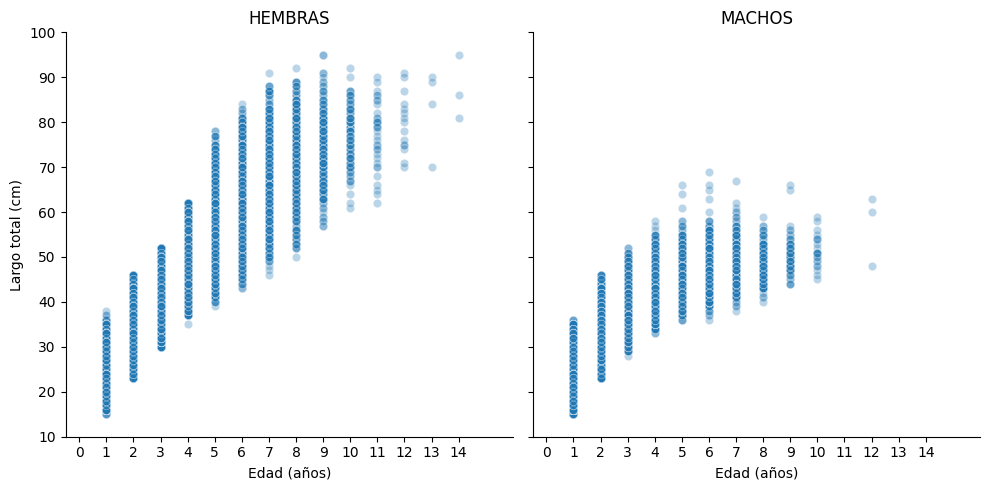

In [181]:
# Diccionario para los títulos y colores
sexo_labels = {1: "MACHOS", 2: "HEMBRAS"}
colores = {1: "blue", 2: "red"}

# Face grid por sexo con paleta para los colores
g = sns.FacetGrid(df, col="sexo", height=5, aspect=1, palette=colores)

# Map_dataframe para graficar con ejes invertidos
g.map_dataframe(sns.scatterplot, x="edad", y="largo_tot", alpha=0.3)

# Etiquetas y ejes
g.set_axis_labels("Edad (años)", "Largo total (cm)")
g.set(xticks=np.arange(0, 15, 1))       # Eje X (edad): de 0 a 12, uno en uno
g.set(xlim=(-0.5, 16))                  # Limites del eje X
g.set(yticks=np.arange(10, 101, 10))      # Eje Y (largo): de 10 a 90, diez en diez
g.set(ylim=(10, 100))                    # Limites del eje Y

# Reemplazar títulos por HEMBRAS y MACHOS
for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(sexo_labels[int(title)])

plt.tight_layout()
plt.show()


**SUPUESTOS A CUMPLIR**

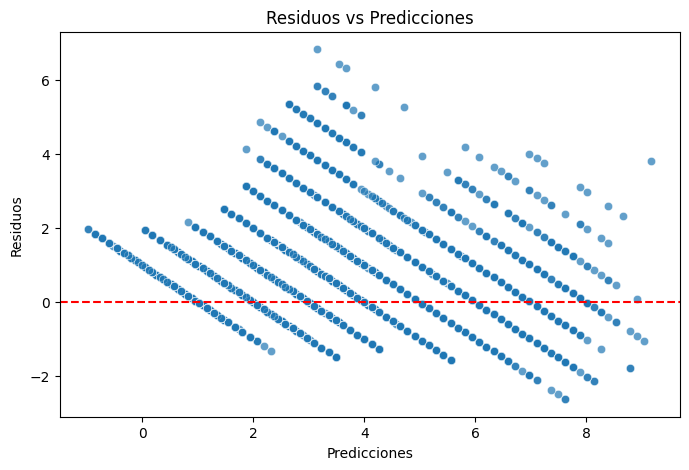

In [182]:
###SUPUESTOS A CUMPLIR###
#### 1-Linealidad: la relación entre las variables predictoras y la variable objetivo es lineal.###
#### 2-Homoscedasticidad: los residuos deben tener varianza constante.####

# Calcular residuos
y_pred = lr.predict(X_test)
residuos = y_test - y_pred

# Gráfico de residuos vs predicciones
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.show()


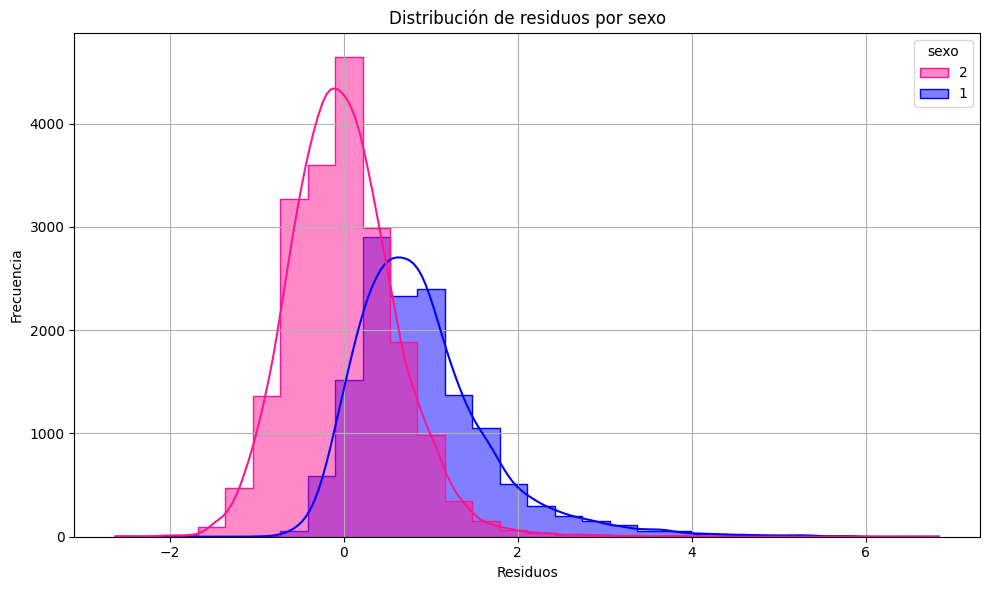

In [183]:
# Guardar residuos en el DataFrame
df["residuos"] = residuos

# Histograma por sexo
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="residuos", hue="sexo", kde=True, bins=30,
             palette={"1": "blue", "2": "deeppink"}, alpha=0.5, element="step")
plt.title("Distribución de residuos por sexo")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()


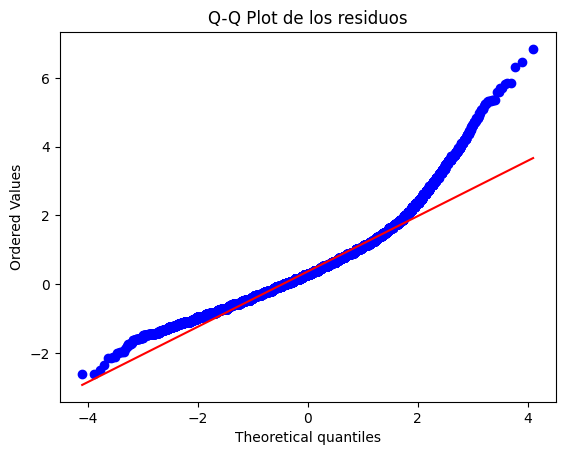

In [184]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de los residuos")
plt.show()


Porcentaje de acierto exacto - Regresión Lineal: 60.13%


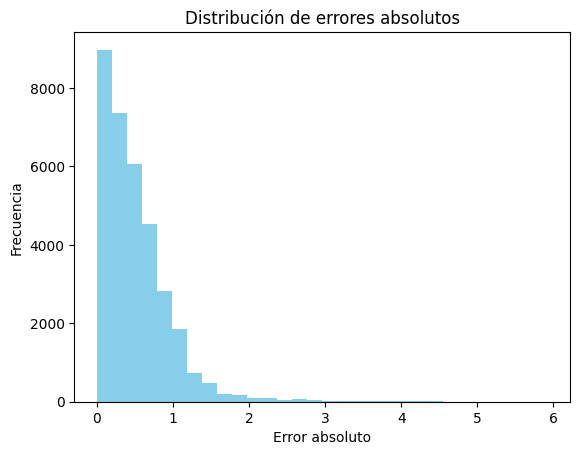

In [185]:
# Predicciones del modelo lineal
predicciones_lr = y_pred_lr

# 20% de margen de error
margen_error = 0.20
limite_superior = y_test * (1 + margen_error)
limite_inferior = y_test * (1 - margen_error)

# Calcular aciertos
aciertos = (predicciones_lr >= limite_inferior) & (predicciones_lr <= limite_superior)
porcentaje_acierto_lr = aciertos.mean() * 100
print(f"Porcentaje de acierto exacto - Regresión Lineal: {porcentaje_acierto_lr:.2f}%")

# Calcular errores absolutos y graficar histograma
errores = abs(y_test - predicciones_lr)
plt.hist(errores, bins=30, color='skyblue')
plt.xlabel("Error absoluto")
plt.ylabel("Frecuencia")
plt.title("Distribución de errores absolutos")
plt.show()

Cantidad original de ejemplares: 168377
Cantidad después de filtrar errores > 6: 168372
Ejemplares eliminados (outliers):
        edad  predicciones_lr   errores
4056      12         5.754554  6.245446
89244     10         3.814523  6.185477
92677     12         4.202530  7.797470
135116    13         6.589835  6.410165
152419    10         3.943859  6.056141


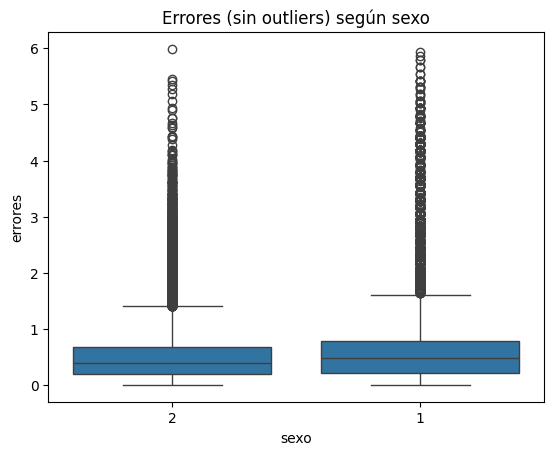

In [186]:
# Predecir para todo el DataFrame
y_pred_lr_full = lr.predict(X)

# Agregar las predicciones al DataFrame
df["predicciones_lr"] = y_pred_lr_full

# Calcular los residuos (pueden ser negativos)
df["residuos"] = df["edad"] - df["predicciones_lr"]

# Calcular el error absoluto
df["errores"] = abs(df["residuos"])

# Filtrar los ejemplares con errores absolutos <= 6
df_filtrado = df[df["errores"] <= 6].copy()

print(f"Cantidad original de ejemplares: {len(df)}")
print(f"Cantidad después de filtrar errores > 6: {len(df_filtrado)}")

# Mostrar los outliers eliminados (solo para verlos)
outliers = df[df["errores"] > 6]
print("Ejemplares eliminados (outliers):")
print(outliers[["edad", "predicciones_lr", "errores"]])

# Visualización después del filtrado
sns.boxplot(data=df_filtrado, x="sexo", y="errores")
plt.title("Errores (sin outliers) según sexo")
plt.show()




**PROBABILIDAD DE ACIERTO EXACTO Y ACIERTO CON +-1 AñO DEL MODELO**

In [187]:
# Armar DataFrame con resultados Totales
df_resultados = X_test.copy()
df_resultados["edad_real"] = y_test
df_resultados["edad_predicha"] = y_pred_lr

# Calcular métricas separadas por sexo
for sexo_valor in [1, 2]:
    sub = df_resultados[df_resultados["sexo"] == sexo_valor]

    # 1. Acierto exacto (redondeando la predicción)
    aciertos_exactos = (sub["edad_predicha"].round() == sub["edad_real"]).mean() * 100

    # 2. Acierto con margen de ±1 año
    aciertos_margen1 = (abs(sub["edad_predicha"] - sub["edad_real"]) <= 1).mean() * 100

    print(f"{'MACHO' if sexo_valor == 1 else 'HEMBRA'}")
    print(f"Acierto exacto (redondeo): {aciertos_exactos:.2f}%")
    print(f"Acierto con ±1 año de diferencia: {aciertos_margen1:.2f}%\n")


MACHO
Acierto exacto (redondeo): 61.64%
Acierto con ±1 año de diferencia: 90.71%

HEMBRA
Acierto exacto (redondeo): 51.93%
Acierto con ±1 año de diferencia: 85.41%



In [188]:
# Armar DataFrame con resultados FILTRADOS POR MAYOR O MENOR A 35CM
df_resultados = X_test.copy()
df_resultados["edad_real"] = y_test
df_resultados["edad_predicha"] = y_pred_lr

# Calcular métricas separadas por sexo y por tamaño
for sexo_valor in [1, 2]:
    for condicion, filtro_texto in [(df_resultados["largo_tot"] < 35, "Menores a 35 cm"),
                                    (df_resultados["largo_tot"] >= 35, "Mayores o iguales a 35 cm")]:

        sub = df_resultados[(df_resultados["sexo"] == sexo_valor) & condicion]

        if len(sub) == 0:
            continue  # evitar divisiones por cero si no hay datos

        # 1. Acierto exacto (redondeando la predicción)
        aciertos_exactos = (sub["edad_predicha"].round() == sub["edad_real"]).mean() * 100

        # 2. Acierto con margen de ±1 año
        aciertos_margen1 = (abs(sub["edad_predicha"] - sub["edad_real"]) <= 1).mean() * 100

        print(f"{'MACHO' if sexo_valor == 1 else 'HEMBRA'} ({filtro_texto}) ")
        print(f"Acierto exacto (redondeo): {aciertos_exactos:.2f}%")
        print(f"Acierto con ±1 año de diferencia: {aciertos_margen1:.2f}%\n")


MACHO (Menores a 35 cm) 
Acierto exacto (redondeo): 71.32%
Acierto con ±1 año de diferencia: 93.07%

MACHO (Mayores o iguales a 35 cm) 
Acierto exacto (redondeo): 58.86%
Acierto con ±1 año de diferencia: 90.03%

HEMBRA (Menores a 35 cm) 
Acierto exacto (redondeo): 72.84%
Acierto con ±1 año de diferencia: 94.83%

HEMBRA (Mayores o iguales a 35 cm) 
Acierto exacto (redondeo): 40.45%
Acierto con ±1 año de diferencia: 80.24%



**DISTRIBUCION DE EDAD POR SEXO**

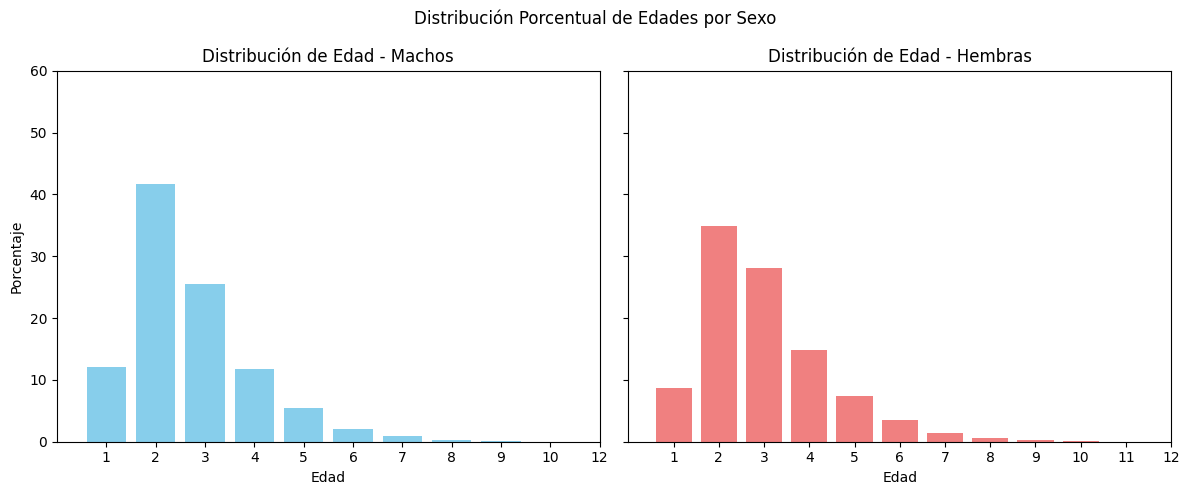

In [189]:
# Asegurarse de tener la columna 'sexo' y 'edad' en el DataFrame original
# 1 = Macho, 2 = Hembra

# Agrupar por sexo y contar proporciones
edad_machos = df_filtrado[df_filtrado["sexo"] == "1"]["edad"].value_counts(normalize=True).sort_index()
edad_hembras = df_filtrado[df_filtrado["sexo"] == "2"]["edad"].value_counts(normalize=True).sort_index()

# Convertir a porcentaje
edad_machos *= 100
edad_hembras *= 100

# Crear gráfico
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Graficar machos
ax[0].bar(edad_machos.index.astype(str), edad_machos.values, color="skyblue")
ax[0].set_title("Distribución de Edad - Machos")
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Porcentaje")
ax[0].set_ylim(0, 60)
ax[0].set_xlim(-1,10)

# Graficar hembras
ax[1].bar(edad_hembras.index.astype(str), edad_hembras.values, color="lightcoral")
ax[1].set_title("Distribución de Edad - Hembras")
ax[1].set_xlabel("Edad")
ax[1].set_xlim(-1,11)

plt.suptitle("Distribución Porcentual de Edades por Sexo")
plt.tight_layout()
plt.show()

**DISTRIBUCION DE EDAD POR SEXO Y LARGO**

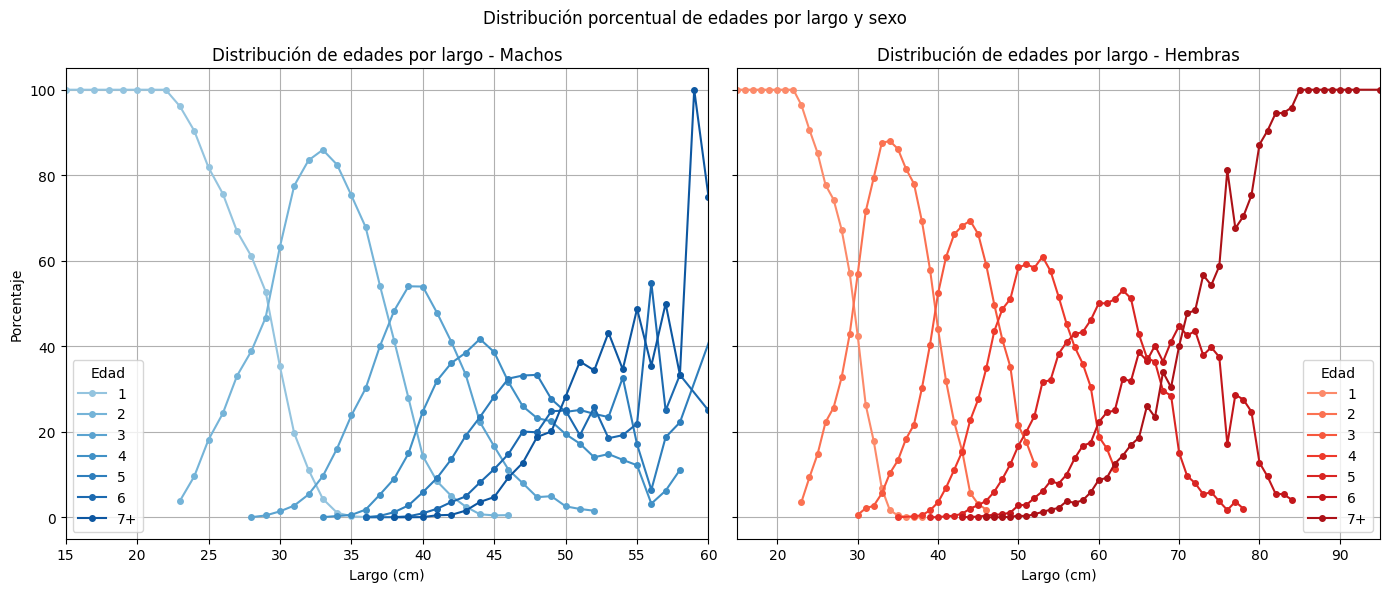

In [190]:
from matplotlib.colors import to_hex

# Crear nueva columna de edad agrupada
df["edad_grupo"] = df["edad"].apply(lambda x: str(x) if x < 7 else "7+")

def proporciones_por_largo(df_sexo):
    tabla = pd.crosstab(df_sexo["largo_tot"], df_sexo["edad_grupo"], normalize='index') * 100
    edades_ordenadas = [str(i) for i in range(1, 7)] + ["7+"]
    tabla = tabla.reindex(columns=edades_ordenadas, fill_value=0)
    return tabla

# Aplicar por sexo
tabla_machos = proporciones_por_largo(df[df["sexo"] == "1"])
tabla_hembras = proporciones_por_largo(df[df["sexo"] == "2"])

# Paletas pastel azules y rosas (rojos claros)
colores_machos = plt.cm.Blues(np.linspace(0.4, 0.85, len(tabla_machos.columns)))
colores_hembras = plt.cm.Reds(np.linspace(0.4, 0.85, len(tabla_hembras.columns)))

# Graficar
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Machos
for i, col in enumerate(tabla_machos.columns):
    mask = tabla_machos[col] > 0  # solo donde hay porcentaje
    ax[0].plot(
        tabla_machos.index[mask],
        tabla_machos[col][mask],
        label=col,
        color=to_hex(colores_machos[i]),
        marker='o',
        markersize=4
    )
ax[0].set_title("Distribución de edades por largo - Machos")
ax[0].set_ylabel("Porcentaje")
ax[0].set_xlabel("Largo (cm)")
ax[0].legend(title="Edad")
ax[0].grid(True)
ax[0].set_xlim(15, 60)

# Hembras
for i, col in enumerate(tabla_hembras.columns):
    mask = tabla_hembras[col] > 0  # solo donde hay porcentaje
    ax[1].plot(
        tabla_hembras.index[mask],
        tabla_hembras[col][mask],
        label=col,
        color=to_hex(colores_hembras[i]),
        marker='o',
        markersize=4
    )
ax[1].set_title("Distribución de edades por largo - Hembras")
ax[1].set_xlabel("Largo (cm)")
ax[1].legend(title="Edad")
ax[1].grid(True)
ax[1].set_xlim(15, 95)

plt.suptitle("Distribución porcentual de edades por largo y sexo")
plt.tight_layout()
plt.show()



In [193]:
df["sexo"] = df["sexo"].astype(int)

**Función de von Bertalanffy**

In [194]:
from scipy.optimize import curve_fit

# 1. Función de von Bertalanffy
def von_bertalanffy(t, Linf, k, t0):
    return Linf * (1 - np.exp(-k * (t - t0)))

# 2. Función inversa: predecir edad a partir de largo
def predecir_edad(largo, Linf, k, t0):
    largo = np.clip(largo, 0, Linf - 0.01)  # evitar log de cero o negativo
    return t0 - (1 / k) * np.log(1 - largo / Linf)

# 3. Ajustar modelo por sexo
machos = df[df["sexo"] == 1]
hembras = df[df["sexo"] == 2]

params_machos, _ = curve_fit(von_bertalanffy, machos["edad"], machos["largo_tot"], bounds=(0, [105, 1, 17]))
params_hembras, _ = curve_fit(von_bertalanffy, hembras["edad"], hembras["largo_tot"], bounds=(0, [120, 1, 17]))

print("Machos - Linf, k, t0:", params_machos)
print("Hembras - Linf, k, t0:", params_hembras)

# 4. Predecir edad usando el modelo inverso
df_resultados = df.copy()
df_resultados["edad_predicha"] = df_resultados.apply(
    lambda row: predecir_edad(
        row["largo_tot"],
        *params_machos if row["sexo"] == 1 else params_hembras
    ),
    axis=1
)

# 5. Evaluar aciertos por sexo y tamaño
for sexo_valor in [1, 2]:
    if sexo_valor == 1:
        filtros = [
            (df_resultados["largo_tot"] < 35, "Menores a 35 cm"),
            (df_resultados["largo_tot"] >= 35, "Mayores o iguales a 35 cm")
        ]
    else:
        filtros = [
            (df_resultados["largo_tot"] < 35, "Menores a 35 cm"),
            ((df_resultados["largo_tot"] >= 35) & (df_resultados["largo_tot"] <= 50), "Entre 35 y 50 cm"),
            (df_resultados["largo_tot"] > 50, "Mayores a 50 cm")
        ]

    for condicion, filtro_texto in filtros:
        sub = df_resultados[(df_resultados["sexo"] == sexo_valor) & condicion]

        if len(sub) == 0:
            continue

        aciertos_exactos = (sub["edad_predicha"].round() == sub["edad"]).mean() * 100
        aciertos_margen1 = (abs(sub["edad_predicha"] - sub["edad"]) <= 1).mean() * 100

        print(f"--- {'MACHO' if sexo_valor == 1 else 'HEMBRA'} ({filtro_texto}) ---")
        print(f"Acierto exacto (redondeo): {aciertos_exactos:.2f}%")
        print(f"Acierto con ±1 año de diferencia: {aciertos_margen1:.2f}%\n")


Machos - Linf, k, t0: [4.36271631e+01 7.96614323e-01 2.50405087e-13]
Hembras - Linf, k, t0: [6.71020896e+01 3.63947040e-01 4.71031532e-19]
--- MACHO (Menores a 35 cm) ---
Acierto exacto (redondeo): 74.19%
Acierto con ±1 año de diferencia: 94.73%

--- MACHO (Mayores o iguales a 35 cm) ---
Acierto exacto (redondeo): 43.22%
Acierto con ±1 año de diferencia: 68.35%

--- HEMBRA (Menores a 35 cm) ---
Acierto exacto (redondeo): 76.46%
Acierto con ±1 año de diferencia: 97.03%

--- HEMBRA (Entre 35 y 50 cm) ---
Acierto exacto (redondeo): 64.30%
Acierto con ±1 año de diferencia: 92.95%

--- HEMBRA (Mayores a 50 cm) ---
Acierto exacto (redondeo): 30.54%
Acierto con ±1 año de diferencia: 49.98%



In [195]:
from scipy.optimize import curve_fit
import numpy as np

# 1. Función de von Bertalanffy
def von_bertalanffy(t, Linf, k, t0):
    return Linf * (1 - np.exp(-k * (t - t0)))

# 2. Función inversa: predecir edad a partir de largo
def predecir_edad(largo, Linf, k, t0):
    largo = np.clip(largo, 0, Linf - 0.01)  # evitar log de cero o negativo
    return t0 - (1 / k) * np.log(1 - largo / Linf)

# 3. Función para calcular pesos
def calcular_pesos(df, largo_col):
    largo_max = df[largo_col].max()
    peso = 1 + (df[largo_col] / largo_max)  # más largo → más peso
    peso_normalizado = peso / peso.mean()   # normalizamos para no desbalancear
    sigma = 1 / peso_normalizado            # sigma es inverso al peso
    return sigma

# 4. Ajustar modelo por sexo usando pesos
machos = df[df["sexo"] == 1]
hembras = df[df["sexo"] == 2]

sigma_machos = calcular_pesos(machos, "largo_tot")
sigma_hembras = calcular_pesos(hembras, "largo_tot")

params_machos, _ = curve_fit(
    von_bertalanffy,
    machos["edad"],
    machos["largo_tot"],
    sigma=sigma_machos,
    bounds=(0, [115, 1, 18])
)

params_hembras, _ = curve_fit(
    von_bertalanffy,
    hembras["edad"],
    hembras["largo_tot"],
    sigma=sigma_hembras,
    bounds=(0, [130, 1, 18])
)

print("Machos - Linf, k, t0:", params_machos)
print("Hembras - Linf, k, t0:", params_hembras)

# 5. Predecir edad usando el modelo inverso
df_resultados = df.copy()
df_resultados["edad_predicha"] = df_resultados.apply(
    lambda row: predecir_edad(
        row["largo_tot"],
        *params_machos if row["sexo"] == 1 else params_hembras
    ),
    axis=1
)

# 6. Evaluar aciertos por sexo y tamaño
for sexo_valor in [1, 2]:
    if sexo_valor == 1:
        filtros = [
            (df_resultados["largo_tot"] < 35, "Menores a 35 cm"),
            (df_resultados["largo_tot"] >= 35, "Mayores o iguales a 35 cm")
        ]
    else:
        filtros = [
            (df_resultados["largo_tot"] < 35, "Menores a 35 cm"),
            ((df_resultados["largo_tot"] >= 35) & (df_resultados["largo_tot"] <= 50), "Entre 35 y 50 cm"),
            (df_resultados["largo_tot"] > 50, "Mayores a 50 cm")
        ]

    for condicion, filtro_texto in filtros:
        sub = df_resultados[(df_resultados["sexo"] == sexo_valor) & condicion]

        if len(sub) == 0:
            continue

        aciertos_exactos = (sub["edad_predicha"].round() == sub["edad"]).mean() * 100
        aciertos_margen1 = (abs(sub["edad_predicha"] - sub["edad"]) <= 1).mean() * 100

        print(f"--- {'MACHO' if sexo_valor == 1 else 'HEMBRA'} ({filtro_texto}) ---")
        print(f"Acierto exacto (redondeo): {aciertos_exactos:.2f}%")
        print(f"Acierto con ±1 año de diferencia: {aciertos_margen1:.2f}%\n")


Machos - Linf, k, t0: [4.41346811e+01 7.79268585e-01 4.30122578e-18]
Hembras - Linf, k, t0: [7.08048901e+01 3.32087130e-01 2.18125300e-15]
--- MACHO (Menores a 35 cm) ---
Acierto exacto (redondeo): 74.19%
Acierto con ±1 año de diferencia: 94.73%

--- MACHO (Mayores o iguales a 35 cm) ---
Acierto exacto (redondeo): 44.64%
Acierto con ±1 año de diferencia: 72.18%

--- HEMBRA (Menores a 35 cm) ---
Acierto exacto (redondeo): 74.01%
Acierto con ±1 año de diferencia: 97.03%

--- HEMBRA (Entre 35 y 50 cm) ---
Acierto exacto (redondeo): 64.99%
Acierto con ±1 año de diferencia: 92.95%

--- HEMBRA (Mayores a 50 cm) ---
Acierto exacto (redondeo): 34.06%
Acierto con ±1 año de diferencia: 57.06%



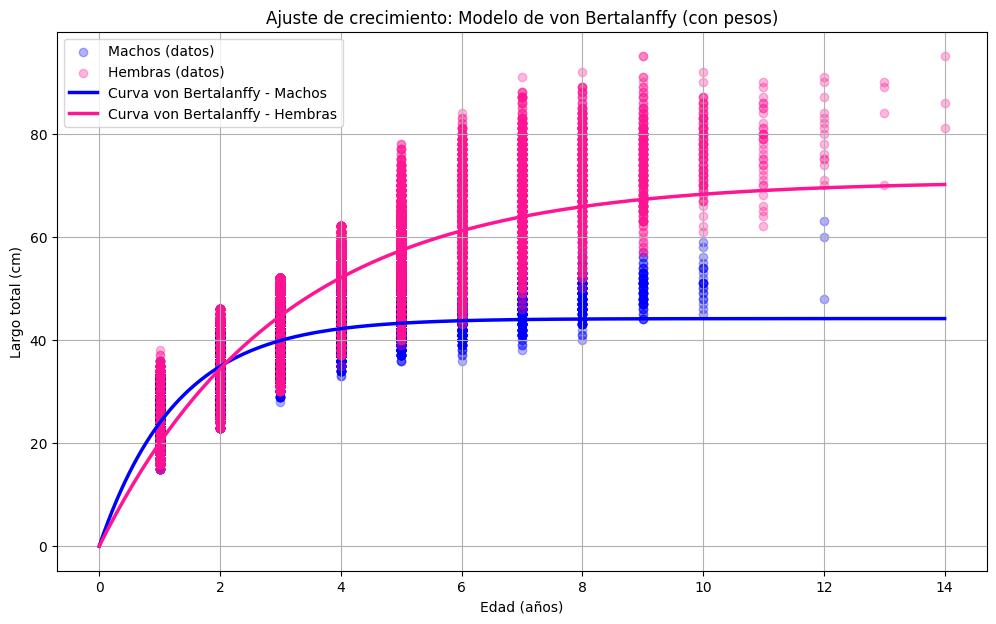

In [196]:
import matplotlib.pyplot as plt

# 1. Crear eje de edades para las curvas
edades = np.linspace(0, 14, 200)

# 2. Calcular curvas ajustadas
curva_machos = von_bertalanffy(edades, *params_machos)
curva_hembras = von_bertalanffy(edades, *params_hembras)

# 3. Graficar datos reales
plt.figure(figsize=(12, 7))
plt.scatter(machos["edad"], machos["largo_tot"], color='blue', alpha=0.3, label="Machos (datos)")
plt.scatter(hembras["edad"], hembras["largo_tot"], color='deeppink', alpha=0.3, label="Hembras (datos)")

# 4. Graficar curvas ajustadas
plt.plot(edades, curva_machos, color='blue', linewidth=2.5, label="Curva von Bertalanffy - Machos")
plt.plot(edades, curva_hembras, color='deeppink', linewidth=2.5, label="Curva von Bertalanffy - Hembras")

# 5. Personalizar gráfico
plt.xlabel("Edad (años)")
plt.ylabel("Largo total (cm)")
plt.title("Ajuste de crecimiento: Modelo de von Bertalanffy (con pesos)")
plt.legend()
plt.grid(True)
plt.show()


Machos - Linf, k, t0: [55.22455122  0.50925647 -0.06431105]
Hembras - Linf, k, t0: [86.6339819   0.19771972 -0.75083612]


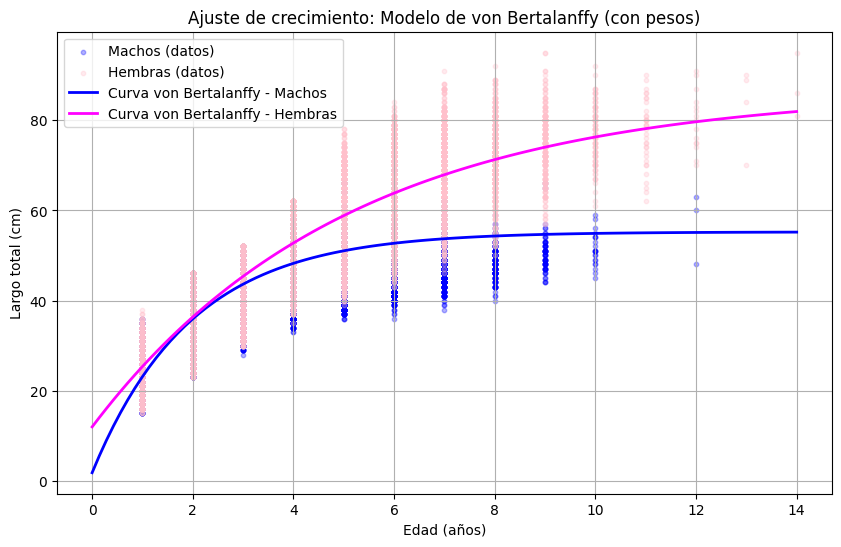

In [197]:
import numpy as np
import pandas as pd
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

# Función von Bertalanffy
def von_bertalanffy(t, Linf, k, t0):
    return Linf * (1 - np.exp(-k * (t - t0)))

# Función de residuo ponderado
def residuo_ponderado(params, t, largo, peso):
    Linf, k, t0 = params
    predicho = von_bertalanffy(t, Linf, k, t0)
    return peso * (predicho - largo)

# Ajuste por sexo con pesos
resultados = {}

for sexo_valor, sexo_nombre in [(1, 'Machos'), (2, 'Hembras')]:
    sub = df[df['sexo'] == sexo_valor].copy()
    t_data = sub['edad'].values
    l_data = sub['largo_tot'].values

    # Definir pesos base = 1
    pesos = np.ones_like(t_data)

    if sexo_valor == 1:
        # Para machos, más peso a grandes (>50cm)
        pesos[l_data > 50] = 20
    else:
        # Para hembras, más peso a grandes (>50 cm)
        pesos[l_data > 50] = 4

    # Valores iniciales
    p0 = [70, 0.2, 0]
    lower_bounds = [0, 0, -5]
    upper_bounds = [120, 1, 17]

    res = least_squares(
        residuo_ponderado,
        p0,
        args=(t_data, l_data, pesos),
        bounds=(lower_bounds, upper_bounds)
    )

    resultados[sexo_nombre] = res.x
    print(f"{sexo_nombre} - Linf, k, t0:", res.x)

# Graficar
edad_plot = np.linspace(0, 14, 100)
plt.figure(figsize=(10, 6))

# Datos originales
plt.scatter(df[df['sexo'] == 1]['edad'], df[df['sexo'] == 1]['largo_tot'], color='blue', alpha=0.3, s=10, label='Machos (datos)')
plt.scatter(df[df['sexo'] == 2]['edad'], df[df['sexo'] == 2]['largo_tot'], color='pink', alpha=0.3, s=10, label='Hembras (datos)')

# Curvas ajustadas
plt.plot(
    edad_plot,
    von_bertalanffy(edad_plot, *resultados['Machos']),
    color='blue',
    linewidth=2,
    label='Curva von Bertalanffy - Machos'
)
plt.plot(
    edad_plot,
    von_bertalanffy(edad_plot, *resultados['Hembras']),
    color='magenta',
    linewidth=2,
    label='Curva von Bertalanffy - Hembras'
)

plt.xlabel('Edad (años)')
plt.ylabel('Largo total (cm)')
plt.title('Ajuste de crecimiento: Modelo de von Bertalanffy (con pesos)')
plt.legend()
plt.grid(True)
plt.show()


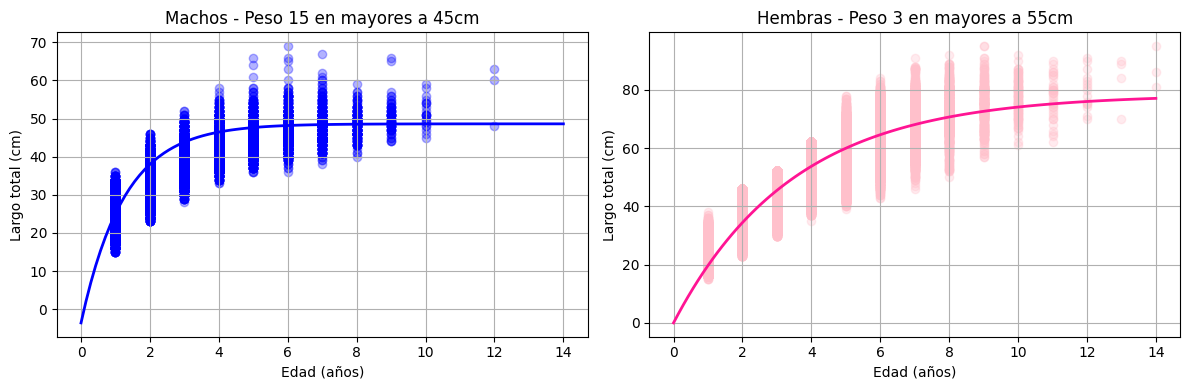

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Configuración de pesos para hembras (sin cambios)
peso_hembras_grandes = 3  # Ejemplo triplicando peso para hembras > 55cm

# Setup del plot
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Calcular pesos para machos
pesos_machos = np.ones(len(machos))
pesos_machos[machos['largo_tot'] >= 45] = 15  # Peso 10 para machos mayores a 50 cm

# Calcular pesos para hembras
pesos_hembras = np.ones(len(hembras))
pesos_hembras[hembras['largo_tot'] >= 55] = peso_hembras_grandes

# Ajuste machos
params_machos, _ = curve_fit(
    von_bertalanffy, machos['edad'], machos['largo_tot'],
    sigma=1/pesos_machos, absolute_sigma=True, bounds=(0, [100, 1, 17])
)

# Ajuste hembras
params_hembras, _ = curve_fit(
    von_bertalanffy, hembras['edad'], hembras['largo_tot'],
    sigma=1/pesos_hembras, absolute_sigma=True, bounds=(0, [125, 1, 17])
)

# Graficar machos
edad_m = np.linspace(0, 14, 100)
largo_m = von_bertalanffy(edad_m, *params_machos)
axs[0].scatter(machos['edad'], machos['largo_tot'], color='blue', alpha=0.3)
axs[0].plot(edad_m, largo_m, color='blue', linewidth=2)
axs[0].set_title(f"Machos - Peso 15 en mayores a 45cm")
axs[0].set_xlabel('Edad (años)')
axs[0].set_ylabel('Largo total (cm)')
axs[0].grid(True)

# Graficar hembras
edad_h = np.linspace(0, 14, 100)
largo_h = von_bertalanffy(edad_h, *params_hembras)
axs[1].scatter(hembras['edad'], hembras['largo_tot'], color='pink', alpha=0.3)
axs[1].plot(edad_h, largo_h, color='deeppink', linewidth=2)
axs[1].set_title(f"Hembras - Peso {peso_hembras_grandes} en mayores a 55cm")
axs[1].set_xlabel('Edad (años)')
axs[1].set_ylabel('Largo total (cm)')
axs[1].grid(True)

plt.tight_layout()
plt.show()



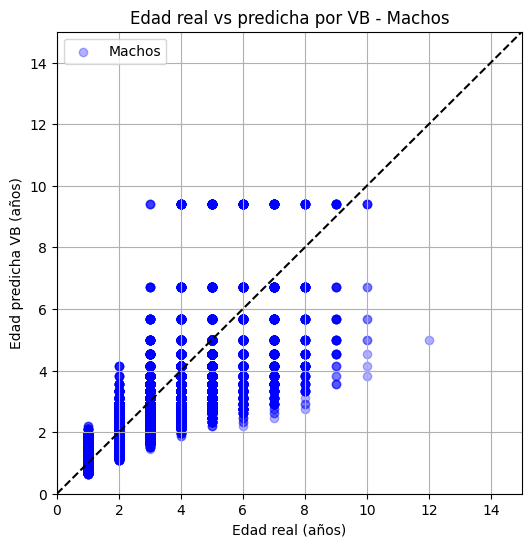

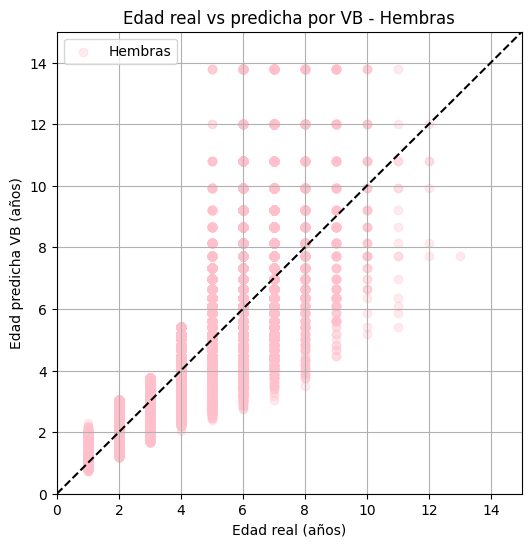

In [214]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes machos y hembras con la columna 'edad_vb' calculada

# Machos
plt.figure(figsize=(6,6))
plt.scatter(machos['edad'], machos['edad_vb'], alpha=0.3, color='blue', label='Machos')
plt.plot([0,15], [0,15], color='black', linestyle='--')  # línea de identidad
plt.xlabel('Edad real (años)')
plt.ylabel('Edad predicha VB (años)')
plt.title('Edad real vs predicha por VB - Machos')
plt.grid(True)
plt.legend()
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

# Hembras
plt.figure(figsize=(6,6))
plt.scatter(hembras['edad'], hembras['edad_vb'], alpha=0.3, color='pink', label='Hembras')
plt.plot([0,15], [0,15], color='black', linestyle='--')  # línea de identidad
plt.xlabel('Edad real (años)')
plt.ylabel('Edad predicha VB (años)')
plt.title('Edad real vs predicha por VB - Hembras')
plt.grid(True)
plt.legend()
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()


In [215]:
def calcular_exactitud_por_rango(df, sexo):
    print(f"=== Exactitud {sexo} por rango de largo ===")
    rangos = df['rango_largo'].unique()
    for r in rangos:
        sub_df = df[df['rango_largo'] == r]
        n = len(sub_df)
        if n == 0:
            continue
        # Redondear edad predicha
        pred_redondeada = sub_df['edad_vb'].round()
        exacto = (pred_redondeada == sub_df['edad']).mean()
        entro_menos1 = ((pred_redondeada >= sub_df['edad'] - 1) &
                        (pred_redondeada <= sub_df['edad'] + 1)).mean()
        print(f"Rango {r}: Exacto: {exacto:.3f}, ±1 año: {entro_menos1:.3f}, n = {n}")

# Usarlo para machos y hembras
calcular_exactitud_por_rango(machos, "Machos")
calcular_exactitud_por_rango(hembras, "Hembras")


=== Exactitud Machos por rango de largo ===
Rango <35 cm: Exacto: 0.764, ±1 año: 0.999, n = 24317
Rango 35-50 cm: Exacto: 0.511, ±1 año: 0.904, n = 43261
Rango 50+ cm: Exacto: 0.072, ±1 año: 0.217, n = 890
=== Exactitud Hembras por rango de largo ===
Rango <35 cm: Exacto: 0.740, ±1 año: 1.000, n = 21847
Rango 35-50 cm: Exacto: 0.639, ±1 año: 0.976, n = 57878
Rango 50+ cm: Exacto: 0.442, ±1 año: 0.831, n = 20184


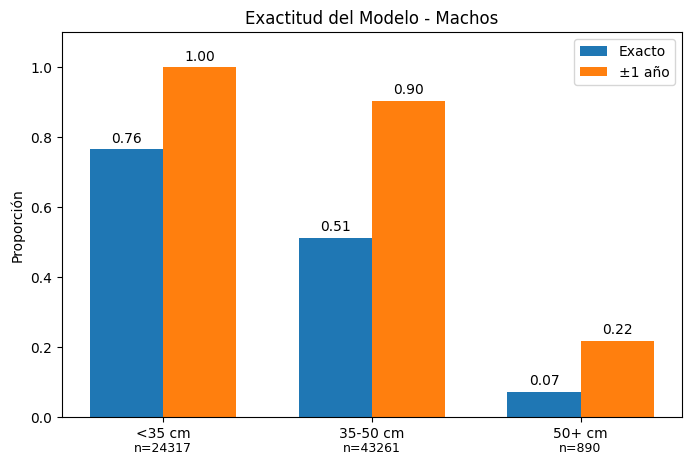

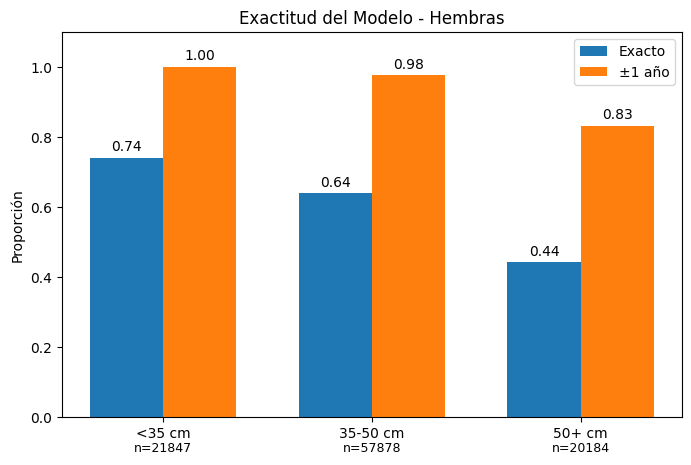

In [216]:
import matplotlib.pyplot as plt
import numpy as np

def graficar_exactitud_barras(df, sexo):
    rangos = ['<35 cm', '35-50 cm', '50+ cm']
    exacto = []
    mas_menos_1 = []
    n_cant = []

    for r in rangos:
        sub_df = df[df['rango_largo'] == r]
        n = len(sub_df)
        if n == 0:
            exacto.append(0)
            mas_menos_1.append(0)
            n_cant.append(0)
            continue
        pred_redondeada = sub_df['edad_vb'].round()
        exacto.append((pred_redondeada == sub_df['edad']).mean())
        mas_menos_1.append(((pred_redondeada >= sub_df['edad'] - 1) & (pred_redondeada <= sub_df['edad'] + 1)).mean())
        n_cant.append(n)

    x = np.arange(len(rangos))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8,5))
    bars1 = ax.bar(x - width/2, exacto, width, label='Exacto')
    bars2 = ax.bar(x + width/2, mas_menos_1, width, label='±1 año')

    ax.set_xticks(x)
    ax.set_xticklabels(rangos)
    ax.set_ylim(0, 1.1)
    ax.set_ylabel('Proporción')
    ax.set_title(f'Exactitud del Modelo - {sexo}')
    ax.legend()

    for i in range(len(rangos)):
        ax.text(x[i] - width/2, exacto[i] + 0.02, f"{exacto[i]:.2f}", ha='center')
        ax.text(x[i] + width/2, mas_menos_1[i] + 0.02, f"{mas_menos_1[i]:.2f}", ha='center')
        ax.text(x[i], -0.1, f"n={n_cant[i]}", ha='center', fontsize=9)

    plt.show()

# Graficar machos y hembras
graficar_exactitud_barras(machos, "Machos")
graficar_exactitud_barras(hembras, "Hembras")


In [217]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

peso_grandes_values = [1, 5, 10, 20]

for peso_grande in peso_grandes_values:
    pesos_machos = np.ones(len(machos))
    pesos_machos[machos['largo_tot'] >= 50] = peso_grande

    params_machos, _ = curve_fit(
        von_bertalanffy, machos['edad'], machos['largo_tot'],
        sigma=1/pesos_machos, absolute_sigma=True, bounds=(0, [100, 1, 17])
    )

    # Calcular edad predicha por modelo
    machos['edad_pred'] = vb_inversa(machos['largo_tot'], *params_machos)

    # Calcular exactitud (ejemplo exacto con redondeo)
    exacto = np.mean(np.round(machos['edad_pred']) == machos['edad'])
    print(f"Peso grandes={peso_grande} → Exactitud machos: {exacto:.3f}")


Peso grandes=1 → Exactitud machos: 0.542
Peso grandes=5 → Exactitud machos: 0.596
Peso grandes=10 → Exactitud machos: 0.574
Peso grandes=20 → Exactitud machos: 0.532


In [218]:
# Función inversa para estimar edad a partir de largo usando parámetros ajustados
def vb_inversa(L, Linf, k, t0):
    # Edad = t0 - (1/k) * ln(1 - L/Linf)
    with np.errstate(divide='ignore', invalid='ignore'):
        age = t0 - (1/k) * np.log(1 - L / Linf)
    return age

# Estimar edades predichas para machos y hembras
machos['edad_pred'] = vb_inversa(machos['largo_tot'], *params_machos)
hembras['edad_pred'] = vb_inversa(hembras['largo_tot'], *params_hembras)

# Redondear edades predichas para comparar exactitud
machos['edad_pred_rounded'] = machos['edad_pred'].round().astype(int)
hembras['edad_pred_rounded'] = hembras['edad_pred'].round().astype(int)

# Función para calcular exactitud exacta y ±1 año
def calcular_exactitud(df):
    exacto = np.mean(df['edad_pred_rounded'] == df['edad'])
    mas_menos_1 = np.mean(np.abs(df['edad_pred_rounded'] - df['edad']) <= 1)
    return exacto, mas_menos_1

# Evaluar exactitud general
exacto_m, masmenos1_m = calcular_exactitud(machos)
exacto_h, masmenos1_h = calcular_exactitud(hembras)

print(f"Machos - Exacta: {exacto_m:.3f}, ±1 año: {masmenos1_m:.3f}")
print(f"Hembras - Exacta: {exacto_h:.3f}, ±1 año: {masmenos1_h:.3f}")

# Evaluar exactitud por rango largo machos
for rango, cond in [('0-35', machos['largo_tot'] < 35),
                    ('35-50', (machos['largo_tot'] >= 35) & (machos['largo_tot'] < 50)),
                    ('50+', machos['largo_tot'] >= 50)]:
    df_rango = machos[cond]
    exacto_r, masmenos1_r = calcular_exactitud(df_rango)
    print(f"Machos rango {rango} cm - Exacta: {exacto_r:.3f}, ±1 año: {masmenos1_r:.3f}, n = {len(df_rango)}")

# Evaluar exactitud por rango largo hembras
for rango, cond in [('0-35', hembras['largo_tot'] < 35),
                    ('35-50', (hembras['largo_tot'] >= 35) & (hembras['largo_tot'] < 50)),
                    ('50+', hembras['largo_tot'] >= 50)]:
    df_rango = hembras[cond]
    exacto_r, masmenos1_r = calcular_exactitud(df_rango)
    print(f"Hembras rango {rango} cm - Exacta: {exacto_r:.3f}, ±1 año: {masmenos1_r:.3f}, n = {len(df_rango)}")


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [219]:
import numpy as np
import pandas as pd

# --- Suponiendo que tenés params_machos y params_hembras del ajuste ---

# Función inversa von Bertalanffy para predecir edad a partir de largo
def vb_inversa(largo, L_inf, k, t0):
    # Evitar valores fuera del rango para logaritmo
    with np.errstate(divide='ignore', invalid='ignore'):
        val = 1 - largo / L_inf
        val[val <= 0] = np.nan  # no puede ser negativo ni cero
        edad = t0 - (1/k) * np.log(val)
    return edad

# Calcular edad predicha con el modelo inverso
machos['edad_pred'] = vb_inversa(machos['largo_tot'], *params_machos)
hembras['edad_pred'] = vb_inversa(hembras['largo_tot'], *params_hembras)

# Limpiar posibles infinitos y NaNs
machos['edad_pred'] = machos['edad_pred'].replace([np.inf, -np.inf], np.nan)
hembras['edad_pred'] = hembras['edad_pred'].replace([np.inf, -np.inf], np.nan)

machos = machos.dropna(subset=['edad_pred'])
hembras = hembras.dropna(subset=['edad_pred'])

# Redondear edades predichas y convertir a entero para comparación
machos['edad_pred_rounded'] = machos['edad_pred'].round().astype(int)
hembras['edad_pred_rounded'] = hembras['edad_pred'].round().astype(int)

# Calcular exactitud exacta y ±1 año
def calcular_exactitud(df):
    exacto = (df['edad_pred_rounded'] == df['edad']).mean()
    entro_1 = ((df['edad_pred_rounded'] >= df['edad'] - 1) & (df['edad_pred_rounded'] <= df['edad'] + 1)).mean()
    n = len(df)
    return exacto, entro_1, n

# Resultados generales
exacto_m, entro1_m, n_m = calcular_exactitud(machos)
exacto_h, entro1_h, n_h = calcular_exactitud(hembras)

print(f"Machos (total) → Exacto: {exacto_m:.3f}, ±1 año: {entro1_m:.3f}, n = {n_m}")
print(f"Hembras (total) → Exacto: {exacto_h:.3f}, ±1 año: {entro1_h:.3f}, n = {n_h}")

# Si querés calcular por rangos de largo, me decís y te lo agrego.


Machos (total) → Exacto: 0.533, ±1 año: 0.888, n = 68298
Hembras (total) → Exacto: 0.624, ±1 año: 0.956, n = 99489


<ipython-input-219-00a28f633673>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machos['edad_pred_rounded'] = machos['edad_pred'].round().astype(int)
<ipython-input-219-00a28f633673>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hembras['edad_pred_rounded'] = hembras['edad_pred'].round().astype(int)
